In [2]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import pywt
import seaborn as sns

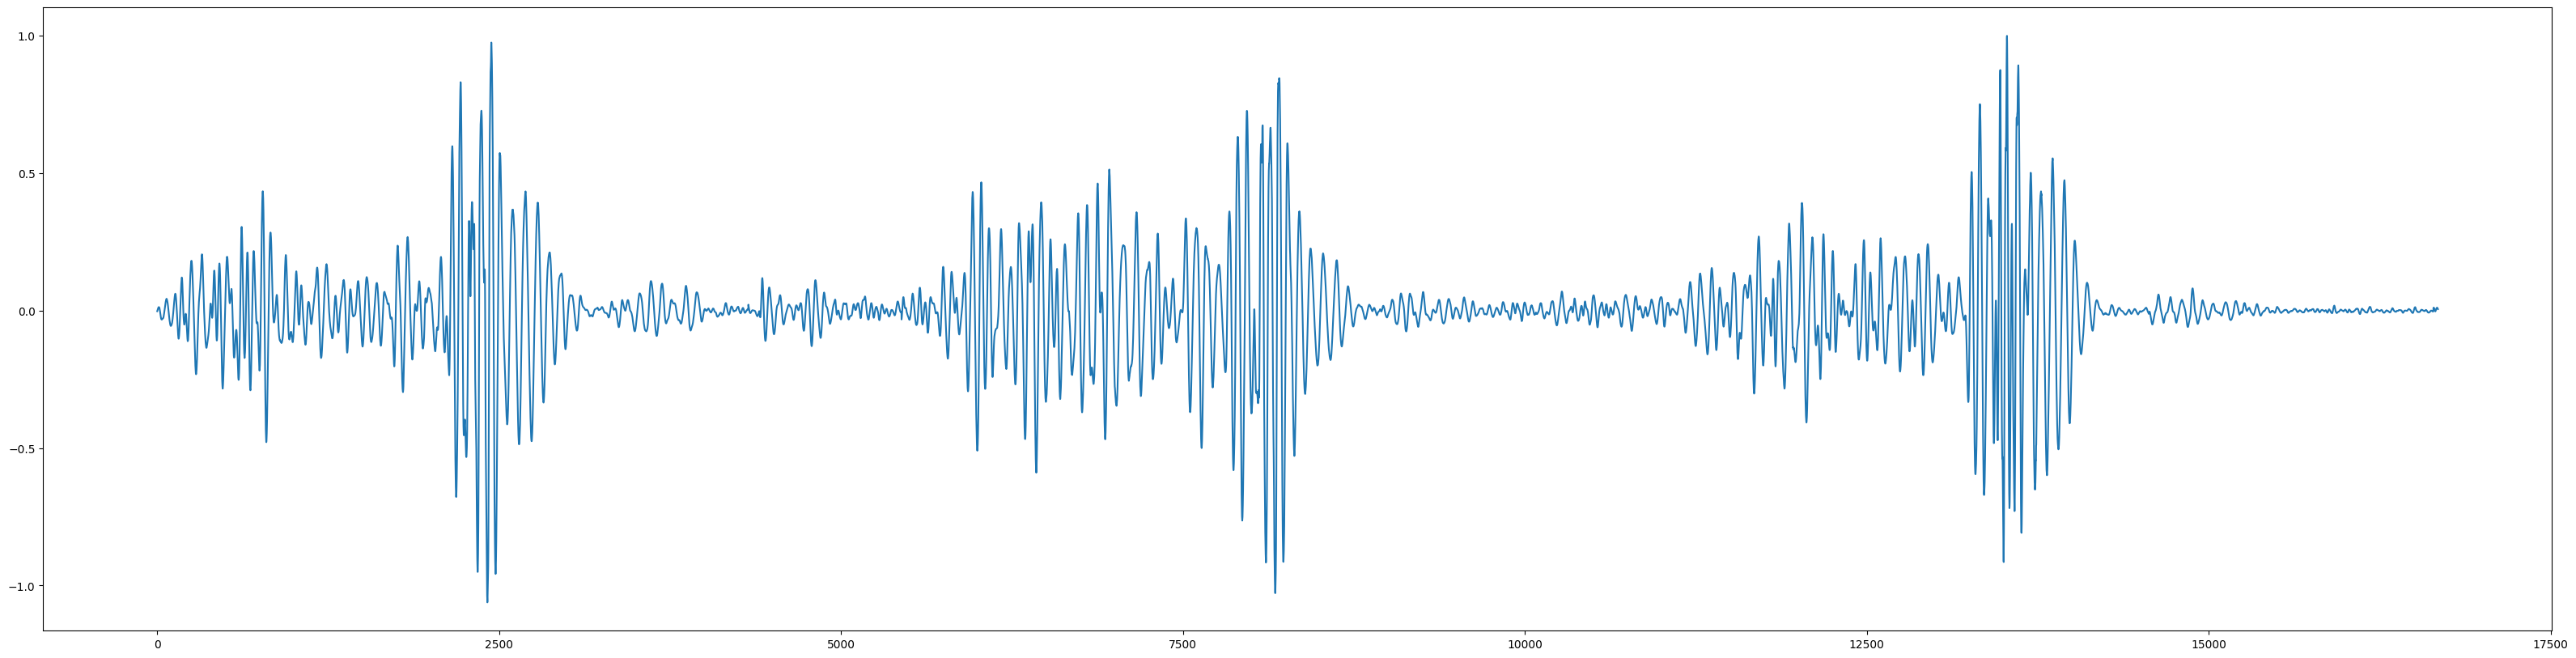

In [23]:
samplerate, data = wavfile.read('../data/DWT_NEW/MR/New_MR_002.wav')
plt.figure(figsize=(40,10))
sns.lineplot(data=data)
plt.show()

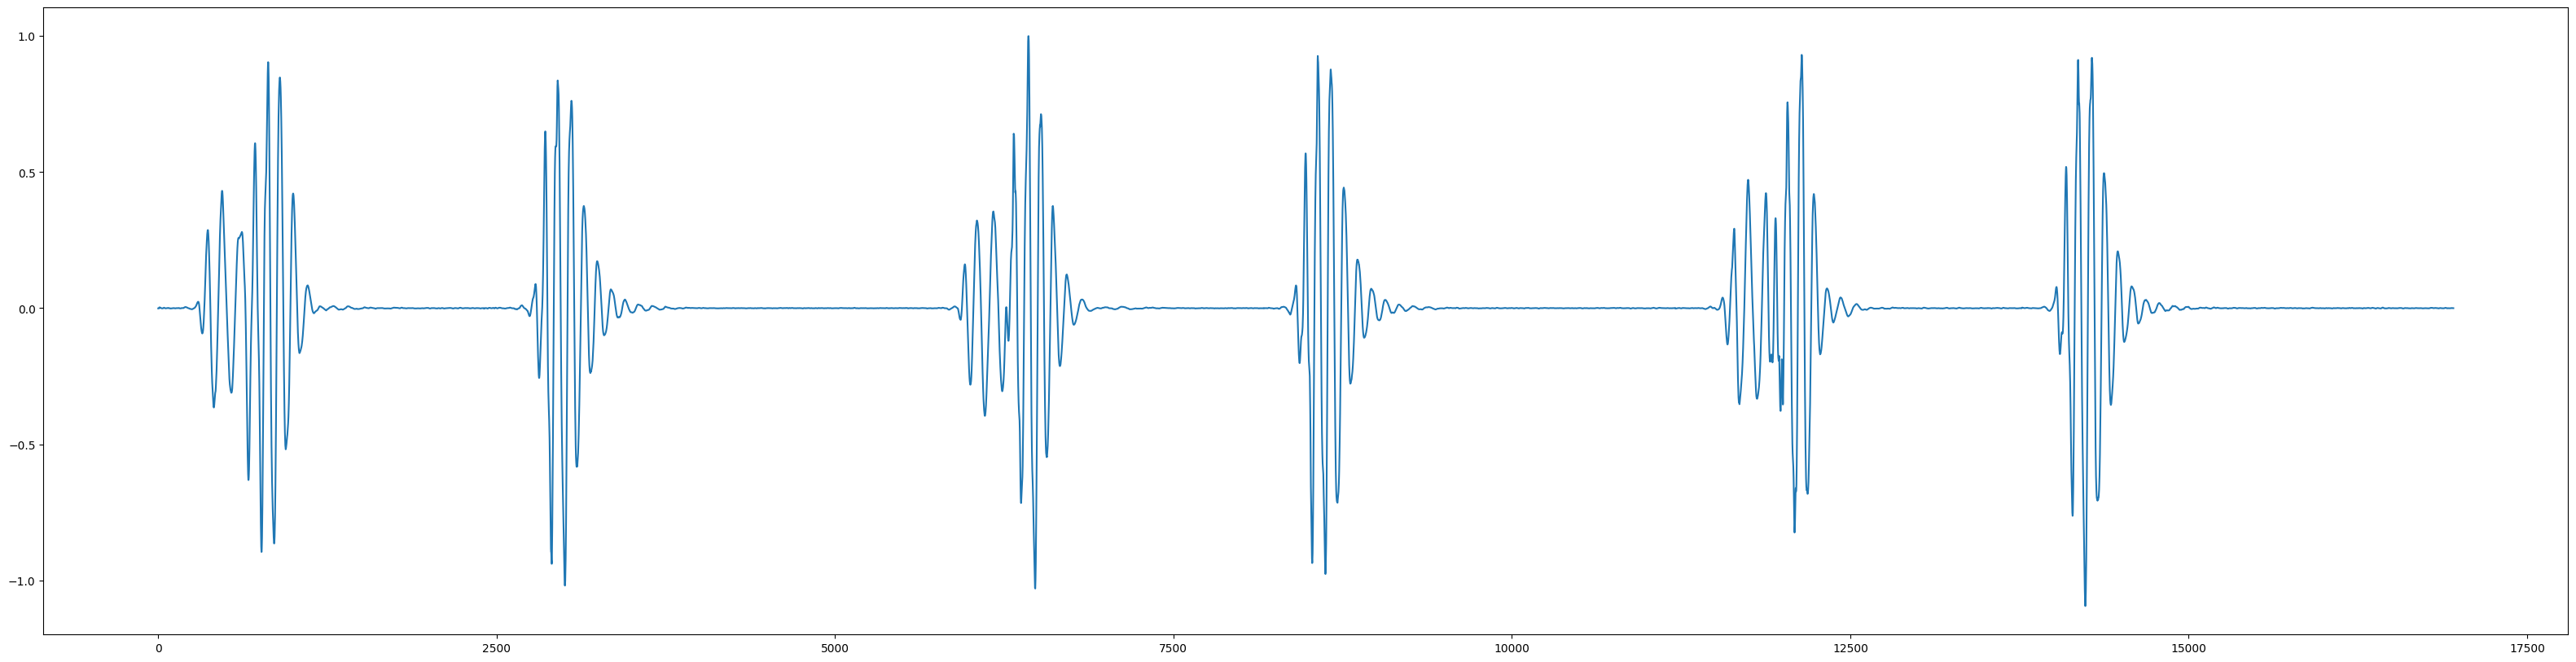

In [19]:
samplerate, data = wavfile.read('../data/DWT_NEW/N/New_N_002.wav')
plt.figure(figsize=(40,10))
sns.lineplot(data=data)
plt.show()

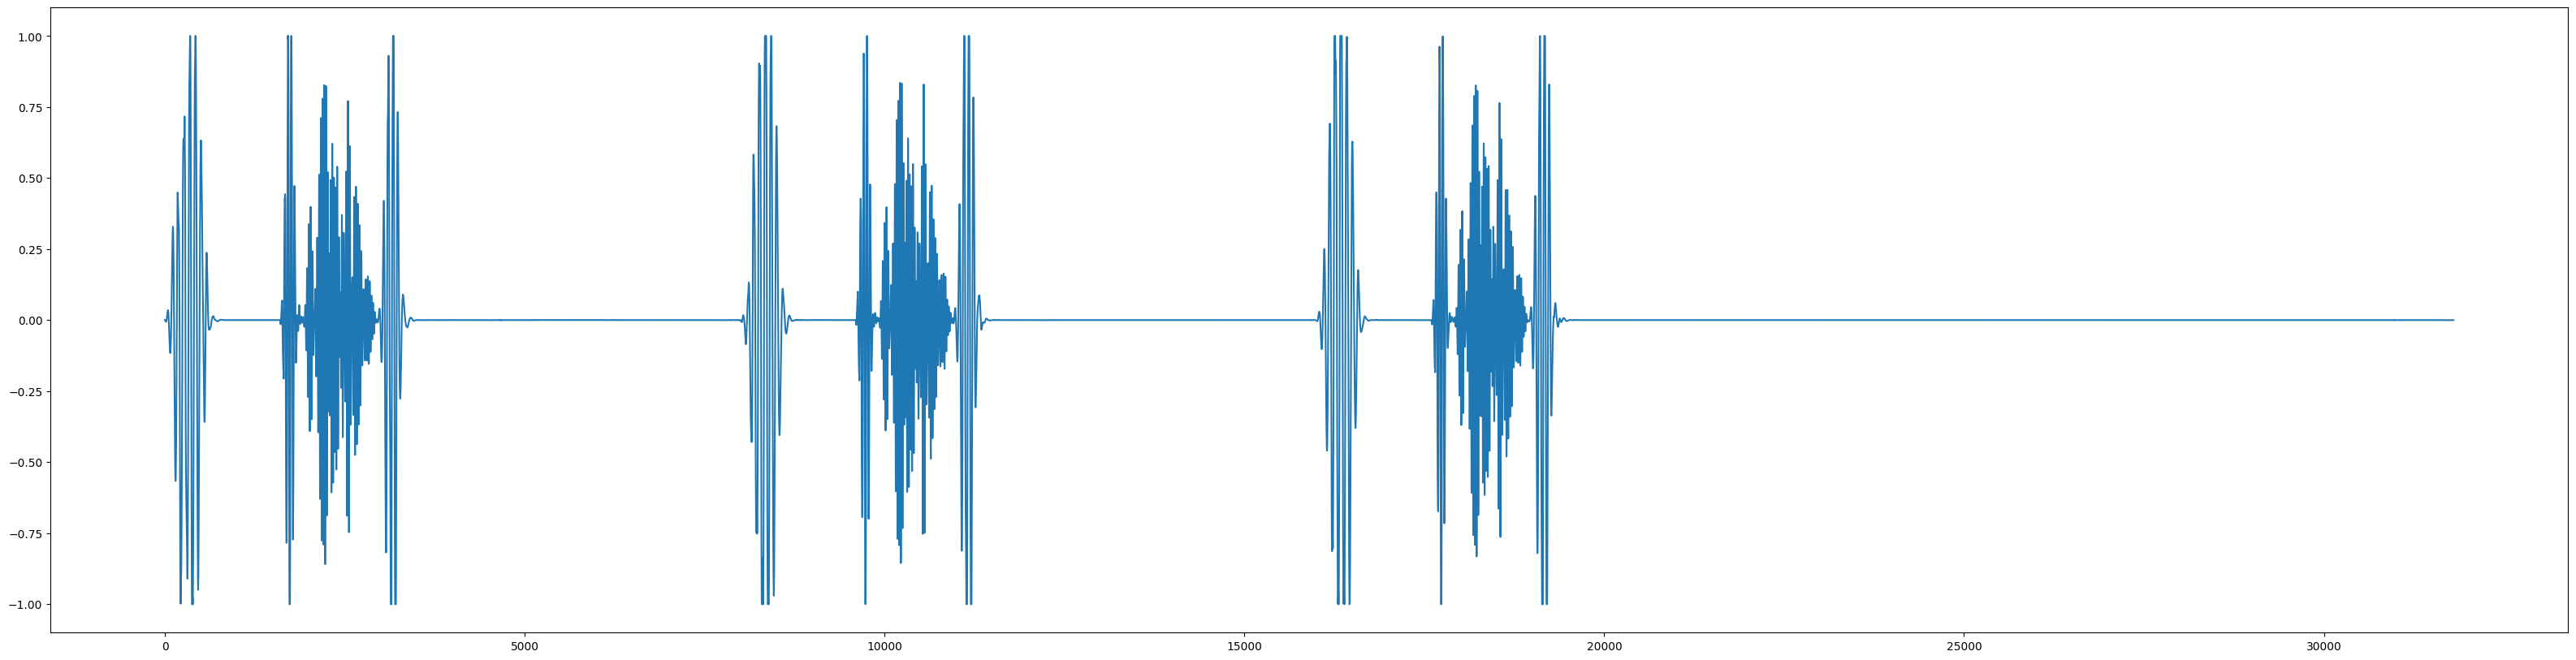

In [20]:
samplerate, data = wavfile.read('../data/DWT_NEW/MVP/New_MVP_002.wav')
plt.figure(figsize=(40,10))
sns.lineplot(data=data)
plt.show()

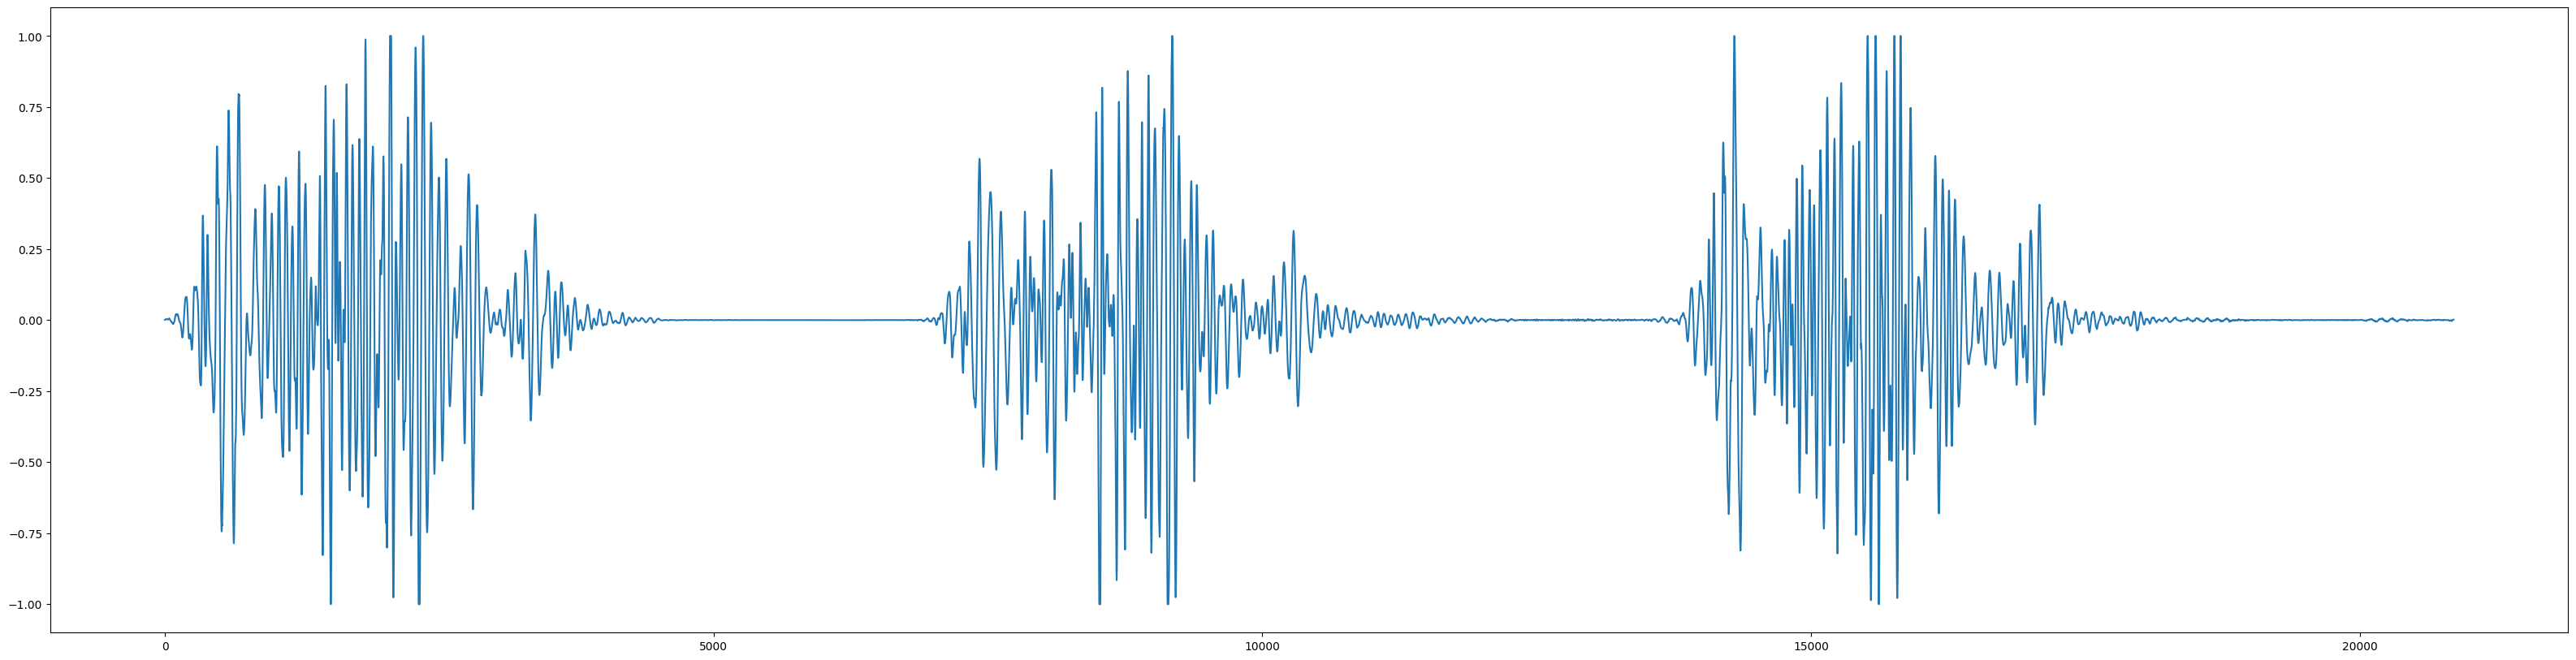

In [21]:
samplerate, data = wavfile.read('../data/DWT_NEW/AS/New_AS_002.wav')
plt.figure(figsize=(40,10))
sns.lineplot(data=data)
plt.show()

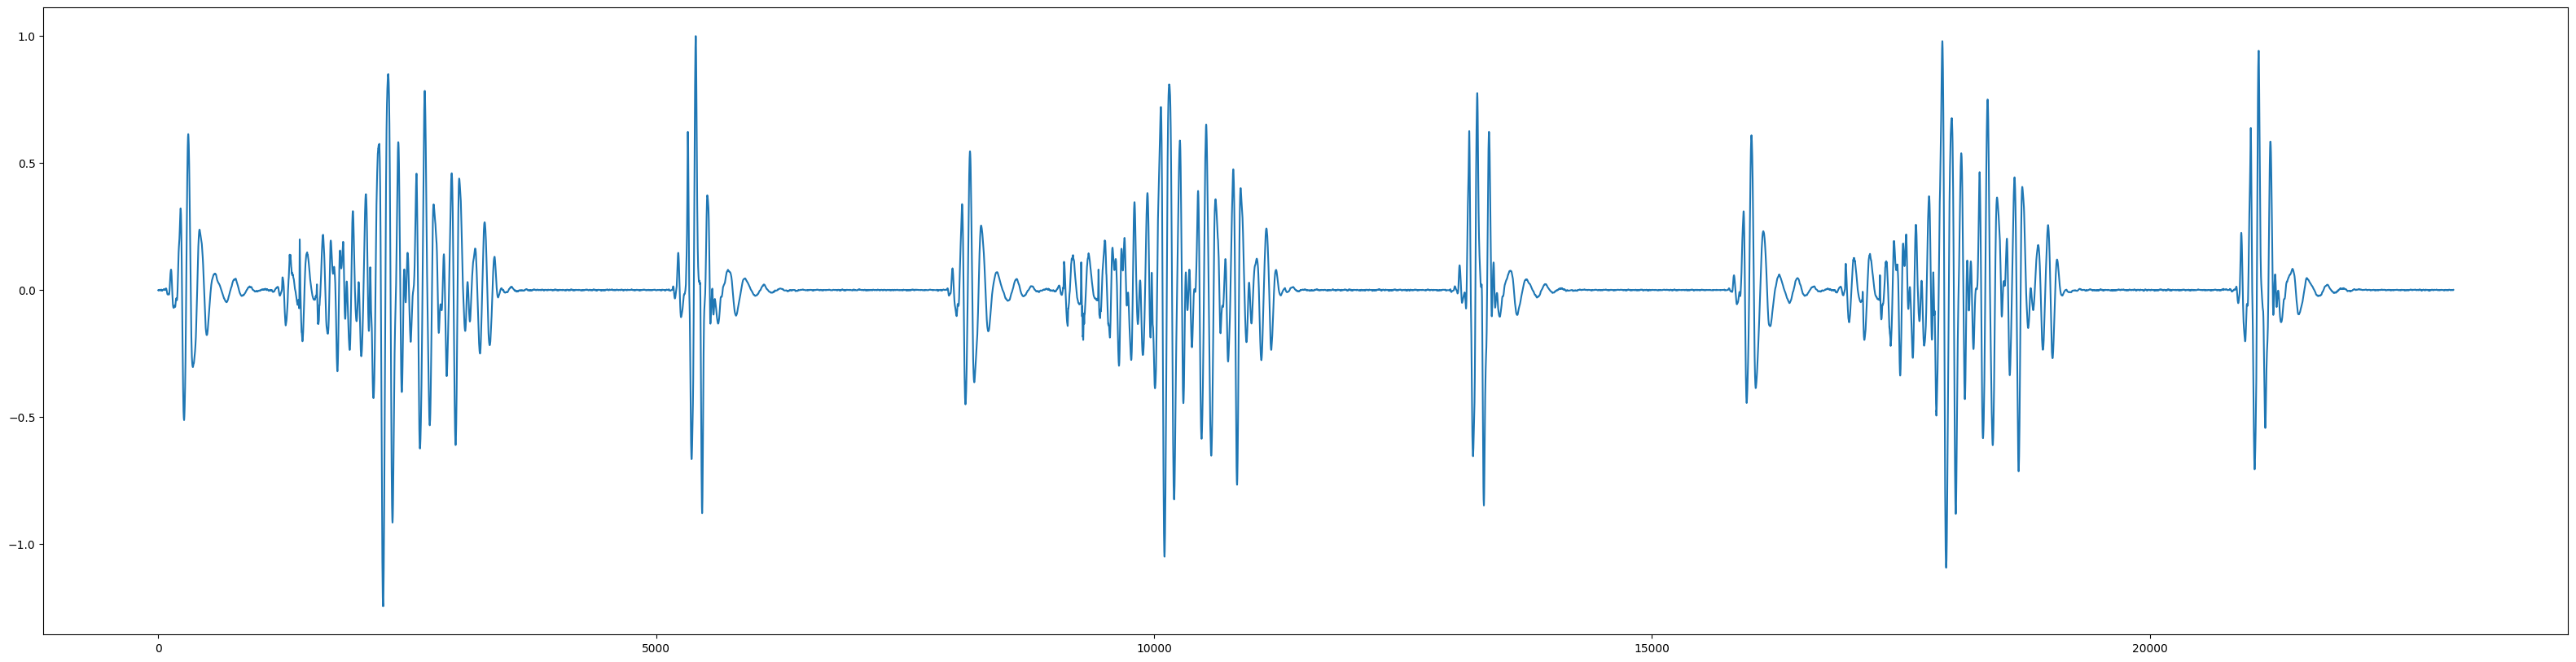

In [22]:
samplerate, data = wavfile.read('../data/DWT_NEW/MS/New_MS_002.wav')
plt.figure(figsize=(40,10))
sns.lineplot(data=data)
plt.show()

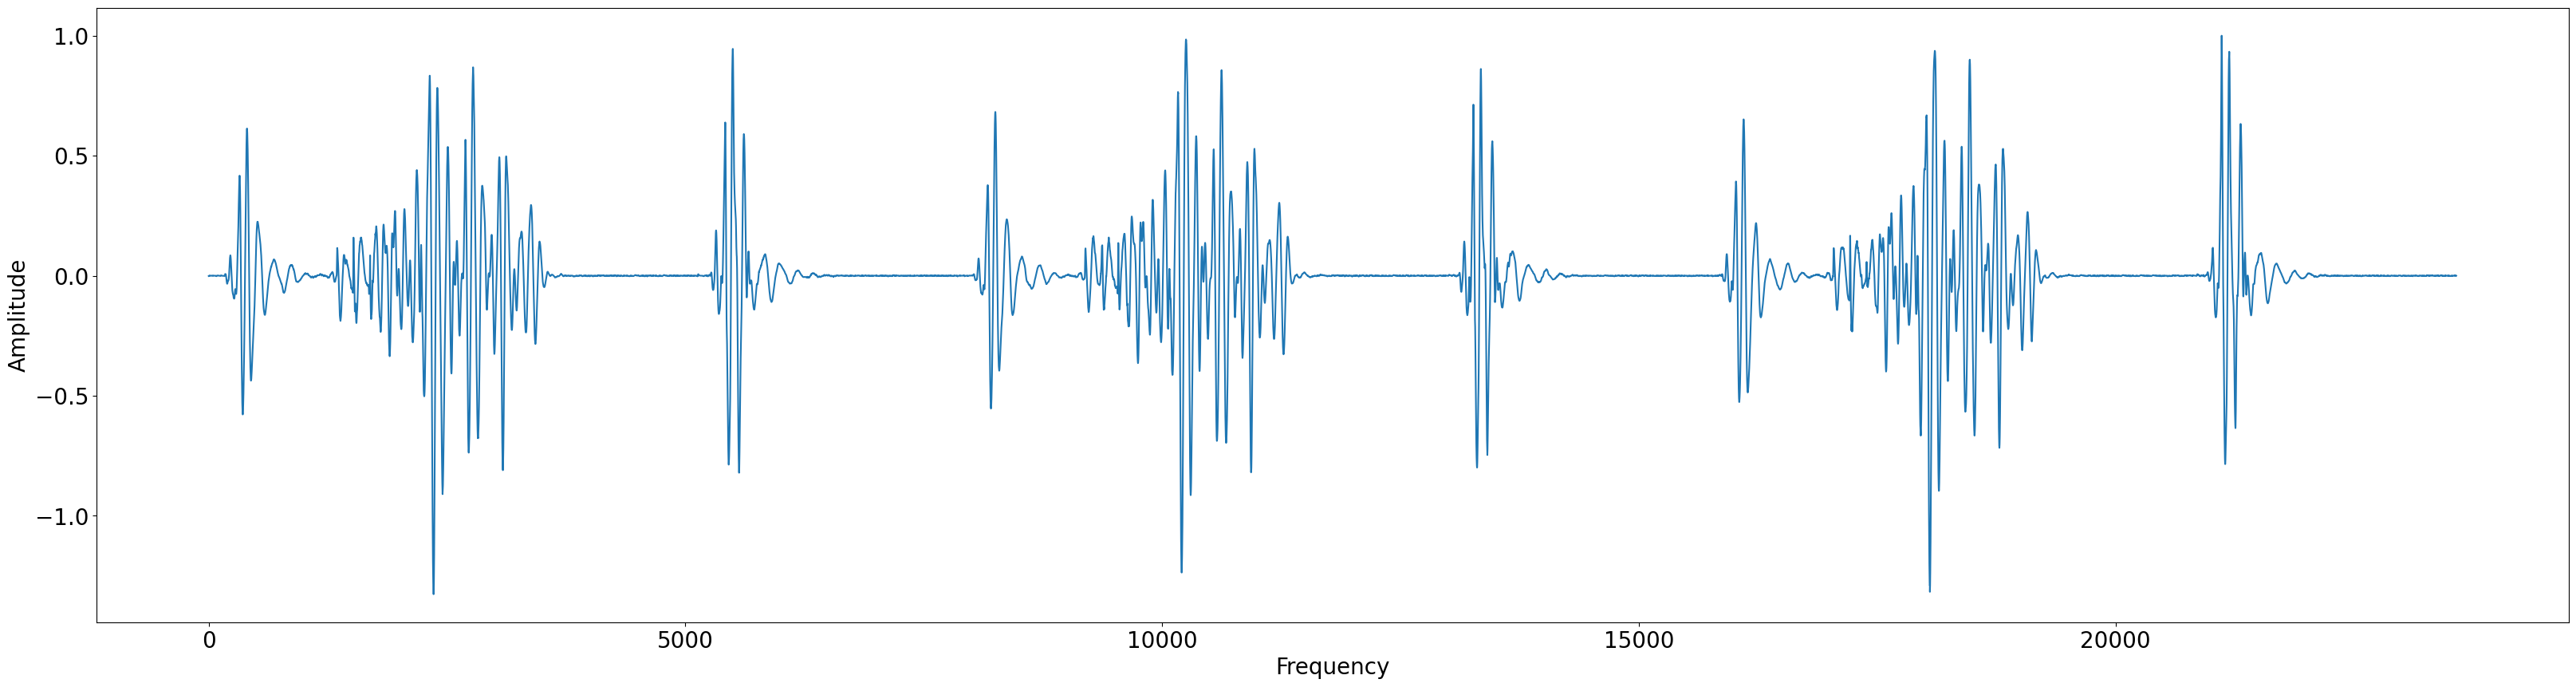

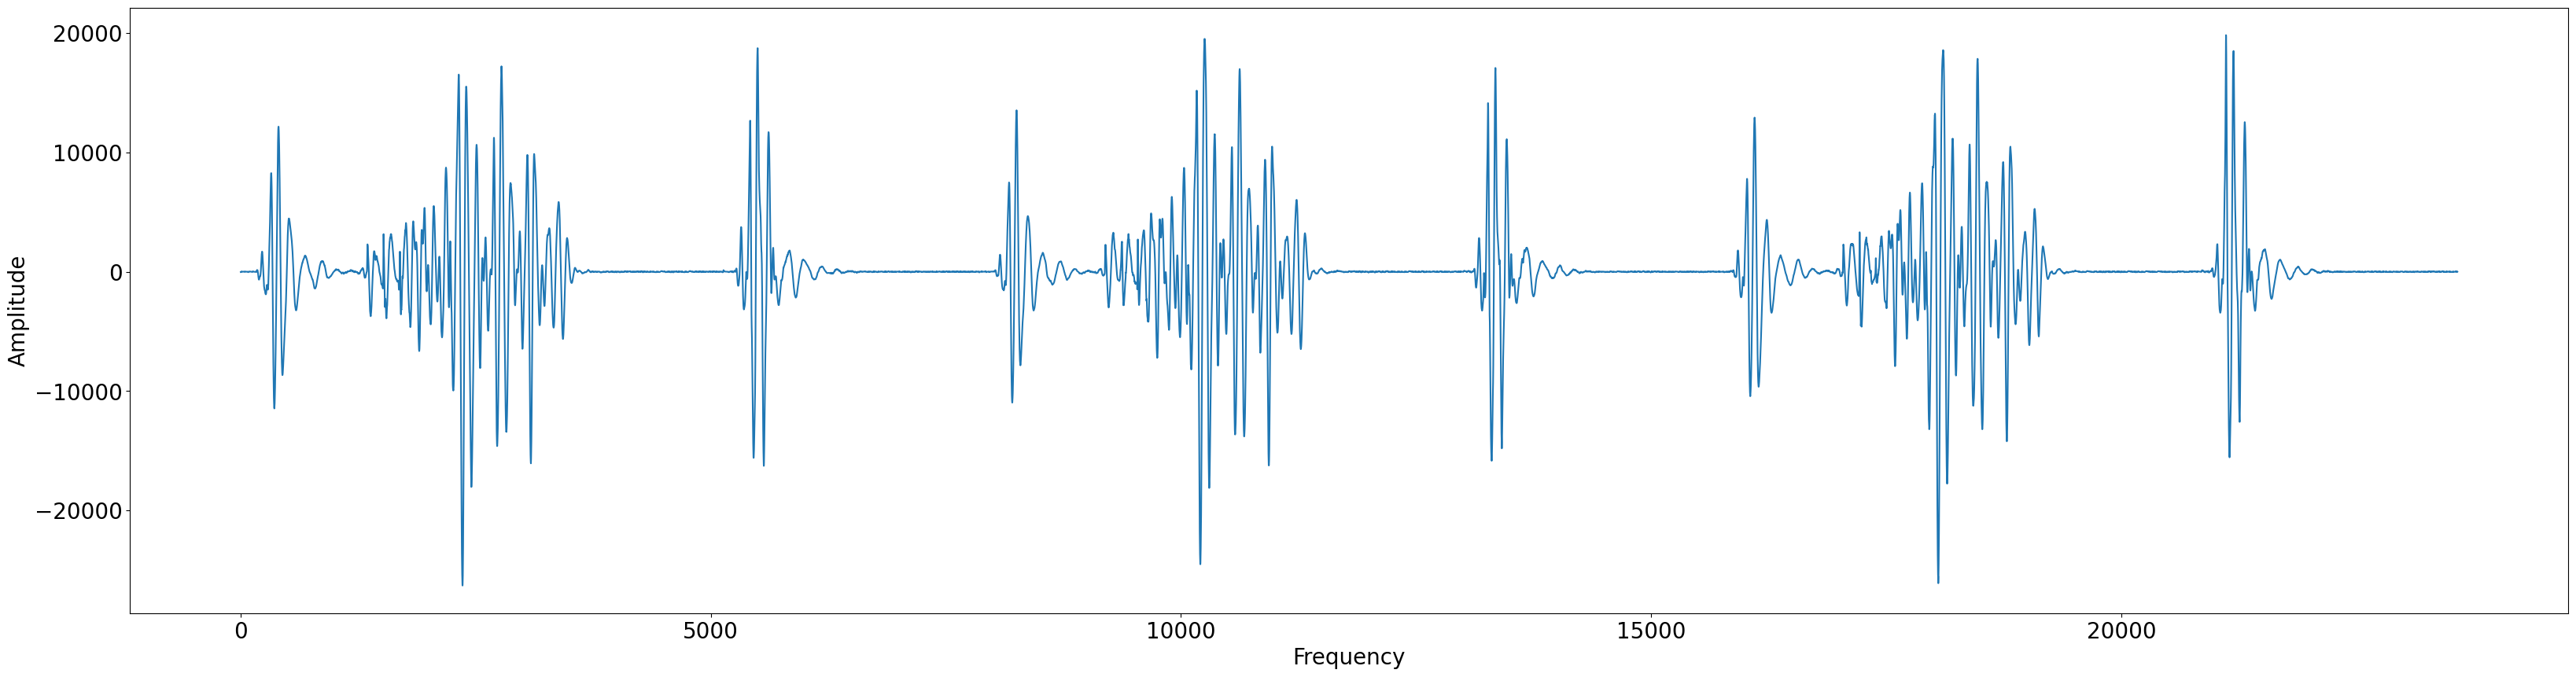

In [16]:
samplerate, data = wavfile.read('../data/DWT_NEW/MS/New_MS_003.wav')
plt.figure(figsize=(40,10))
sns.lineplot(data=data)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.xlabel('Frequency', fontsize=20)
plt.show()

samplerate, data = wavfile.read('../data/training/MS/New_MS_003.wav')
plt.figure(figsize=(40,10))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.xlabel('Frequency', fontsize=20)
sns.lineplot(data=data)
plt.show()

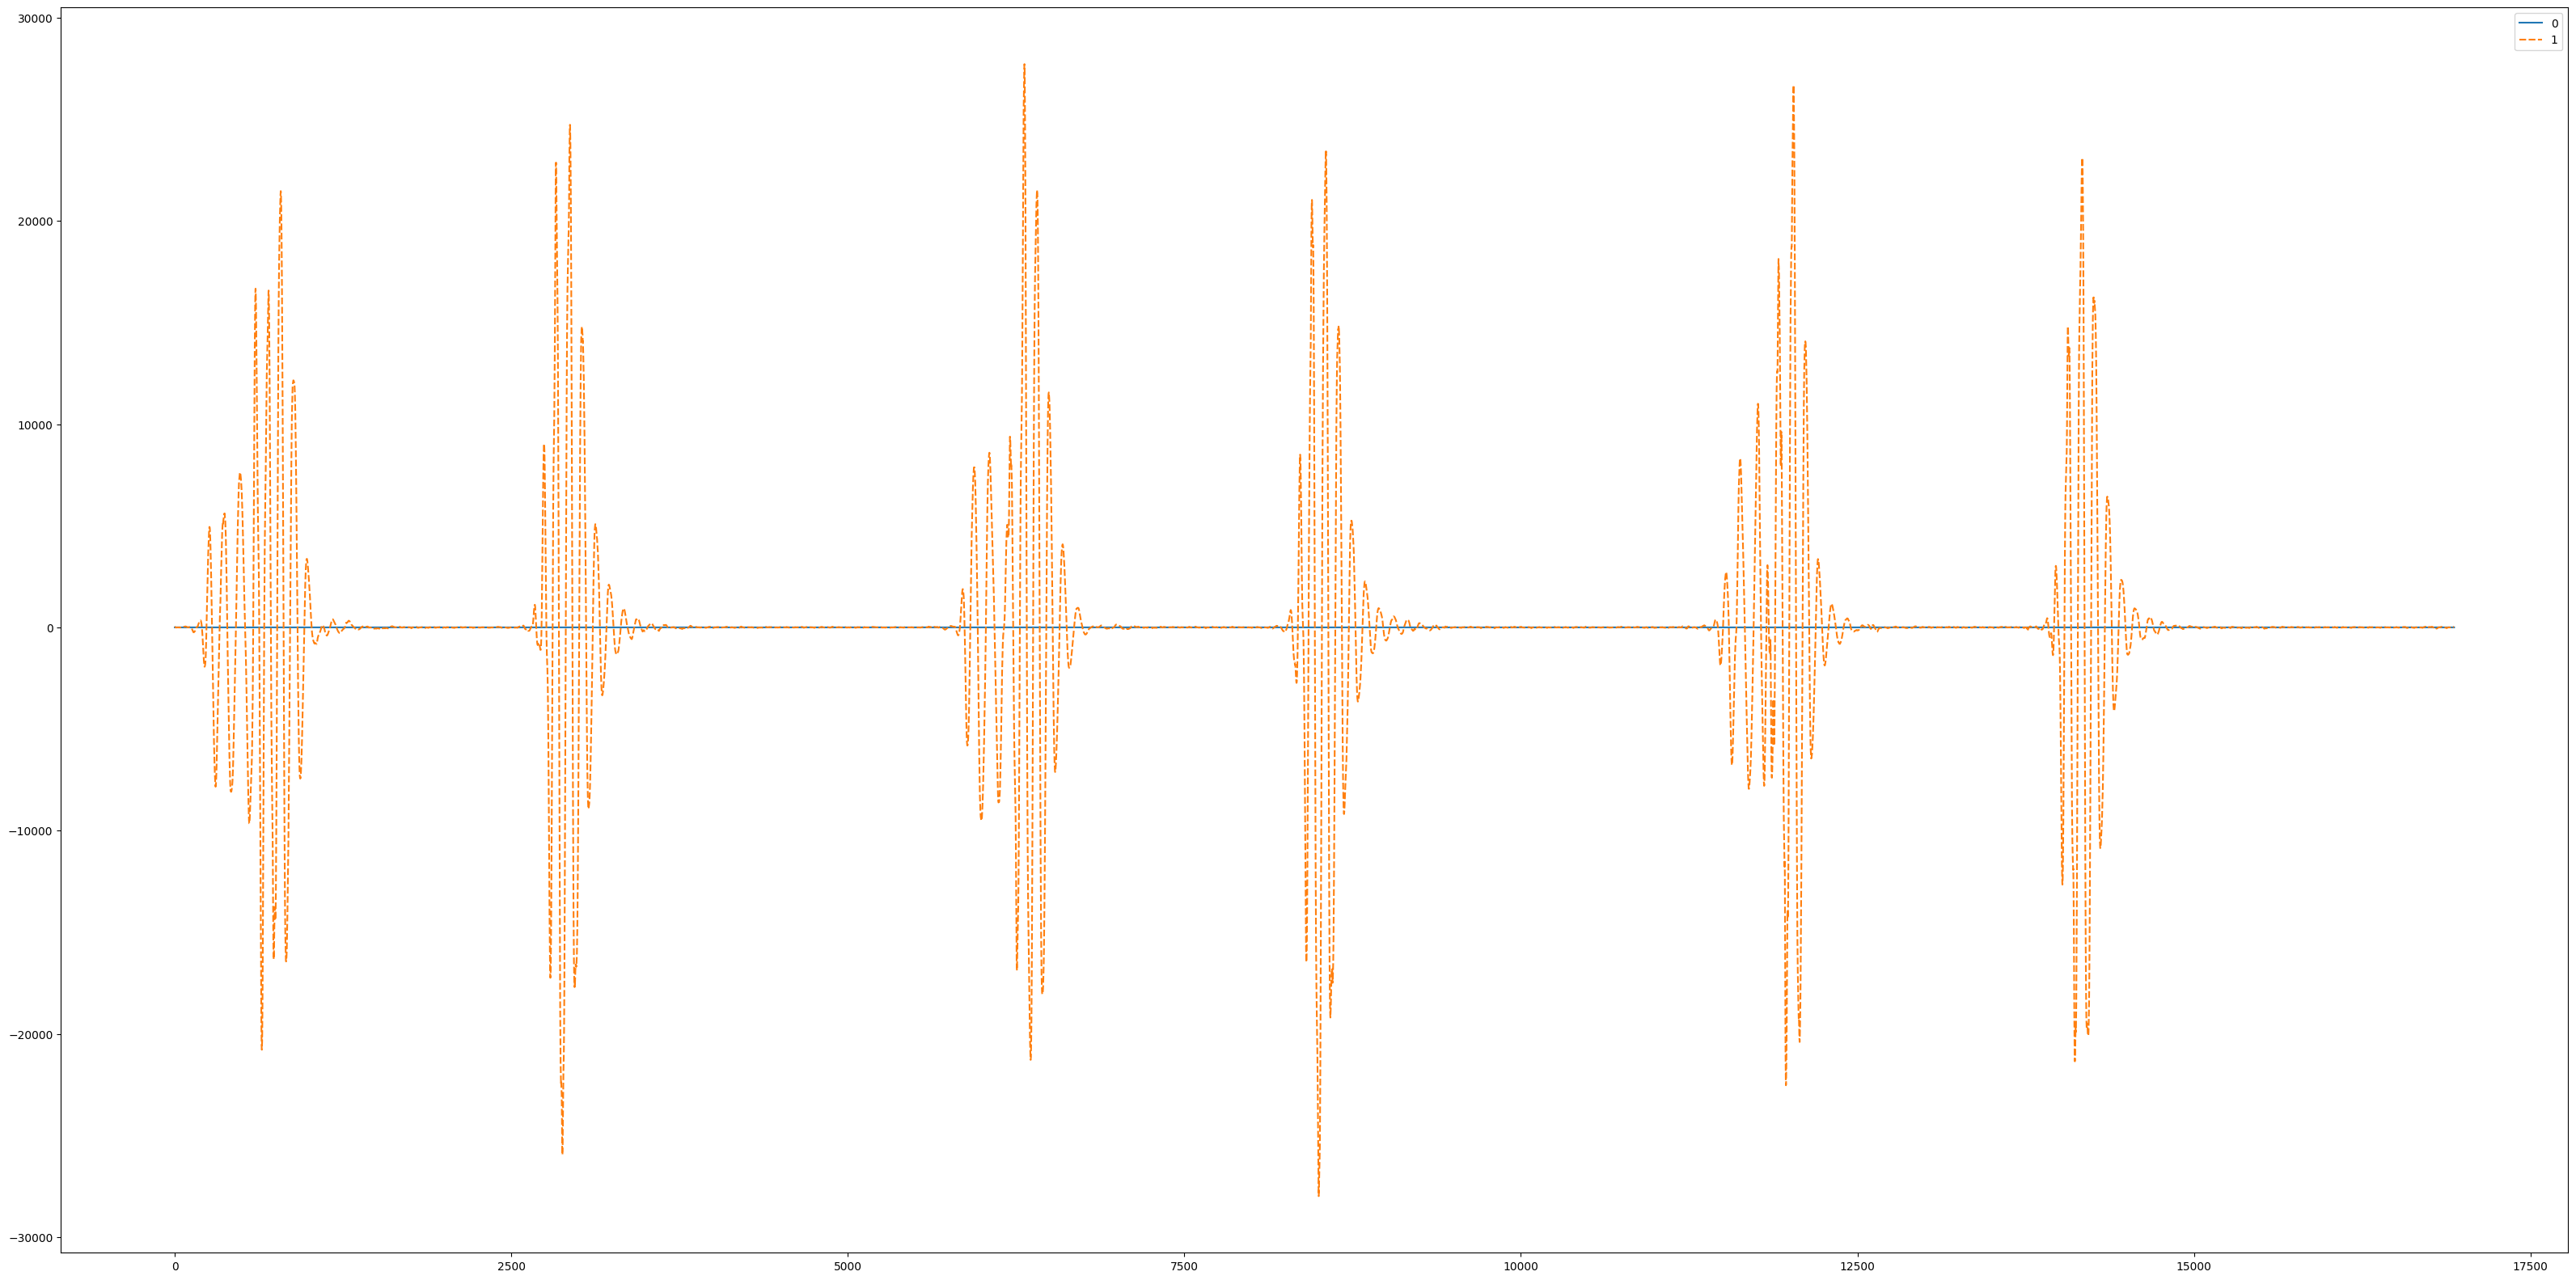

In [6]:
samplerate, data = wavfile.read('../data/DWT_NEW/N/New_N_003.wav')
samplerate2, data2 = wavfile.read('../data/training/N/New_N_003.wav')
plt.figure(figsize=(40,20))
z = [data, data2]
sns.lineplot(data=z)
plt.show()